In [1]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
req = requests.get('https://stats.espncricinfo.com/ci/engine/stats/index.html?class=2;spanmin1=1+jan+2014;spanval1=span;template=results;type=batting').text

In [4]:
soup = BeautifulSoup(req)

In [5]:
div_ = soup.find('div',class_='pnl650M')

In [6]:
table = soup.find_all('table',class_='engineTable')
data = table[2]

In [7]:
with open ('players_2014.csv','w') as r:
    for row in data.find_all('tr'):
        for cell in row.find_all('td'):
            r.write(cell.text.ljust(22))
            r.write(',')
        r.write('\n')

In [8]:
df = pd.read_csv('players_2014.csv',header=None)

In [9]:
df.drop([15,16],axis=1,inplace=True)

In [10]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,V Kohli (INDIA),2014-2020,123,121,21,6713,160*,67.13,6925,96.93,26,30,4,613,81
1,RG Sharma (INDIA),2014-2020,110,109,12,5941,264,61.24,6232,95.33,25,23,5,561,191
2,JE Root (ENG),2014-2020,126,118,18,5296,133*,52.96,6013,88.07,16,29,3,427,39
3,KS Williamson (NZ),2014-2020,104,102,8,4898,148,52.10,5900,83.01,10,33,1,461,41
4,LRPL Taylor (NZ),2014-2020,103,99,23,4656,181*,61.26,5476,85.02,13,27,2,394,46


In [11]:
columns = ['name','duration','matches','inns','NO','runs','highest','average','BF','SR','100','50','0','4s','6s']

In [12]:
df.columns = columns

Text(0, 0.5, 'Average')

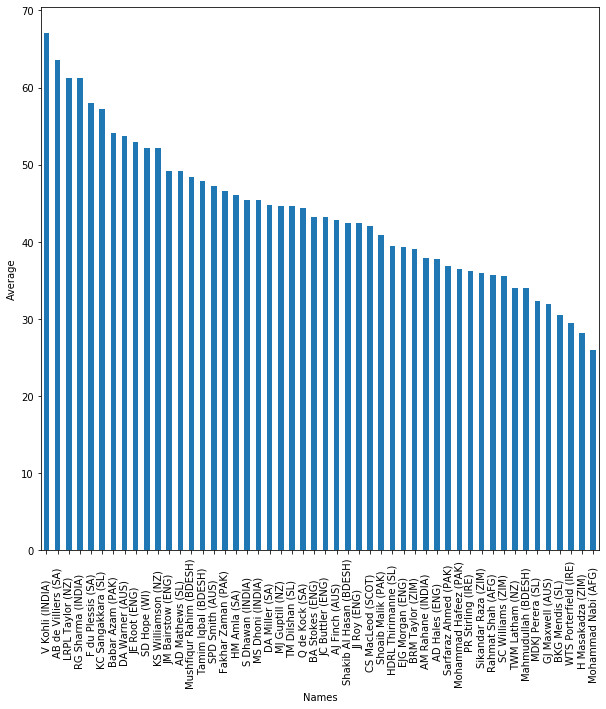

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
df.groupby('name')['average'].sum().sort_values(ascending=False).plot.bar()
plt.xlabel('Names')
plt.ylabel('Average')

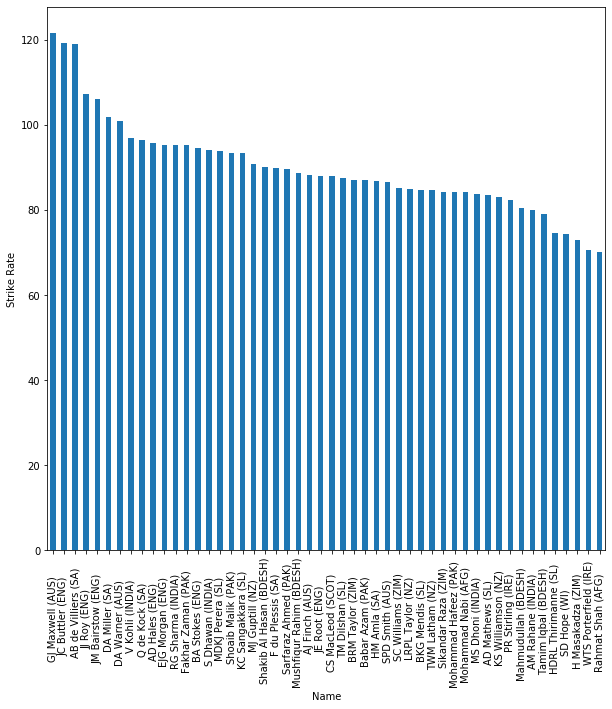

In [14]:
plt.figure(figsize=(10,10))
df.groupby('name')['SR'].sum().sort_values(ascending=False).plot.bar()
plt.xlabel('Name')
plt.ylabel('Strike Rate')
plt.show()

In [16]:
pd.set_option('display.max_columns',None)

In [24]:
df = df.head(35)

In [25]:
df

,name,duration,matches,inns,NO,runs,highest,average,BF,SR,100,50,0,4s,6s
0,V Kohli (INDIA),2014-2020,123,121,21,6713,160*,67.13,6925,96.93,26,30,4,613,81
1,RG Sharma (INDIA),2014-2020,110,109,12,5941,264,61.24,6232,95.33,25,23,5,561,191
2,JE Root (ENG),2014-2020,126,118,18,5296,133*,52.96,6013,88.07,16,29,3,427,39
3,KS Williamson (NZ),2014-2020,104,102,8,4898,148,52.10,5900,83.01,10,33,1,461,41
4,LRPL Taylor (NZ),2014-2020,103,99,23,4656,181*,61.26,5476,85.02,13,27,2,394,46
5,S Dhawan (INDIA),2014-2020,105,103,5,4457,143,45.47,4740,94.02,12,24,3,560,59
6,F du Plessis (SA),2014-2019,96,91,15,4405,185,57.96,4896,89.97,12,28,3,398,53
7,Q de Kock (SA),2014-2020,105,105,6,4394,178,44.38,4558,96.40,11,25,4,510,65
8,AJ Finch (AUS),2014-2020,108,105,3,4368,153*,42.82,4945,88.33,15,24,10,418,107
9,MJ Guptill (NZ),2014-2020,107,106,10,4286,237*,44.64,4722,90.76,12,20,9,440,126


In [26]:
players = list(df.name.values)

In [27]:
averages = list(df.average.values)

In [28]:
strike_rates = list(df.SR.values)

In [29]:
new_col  = pd.read_excel('avg_str.xlsx',header=None)

In [30]:
new_col.columns  =['win_avg','win_str']

In [31]:
new_col.columns  =['win_avg','win_str']

In [33]:
df  =pd.concat([df,new_col],axis=1)

In [34]:
win_str = list(df['win_str'].values)
win_avg = list(df['win_avg'].values)

In [35]:
player_avg = {}
for player,average in zip(players,averages):
    player_avg[player] = average

In [36]:
player_win_avg = {}
for player,win_avgs in zip(players,win_avg):
    player_win_avg[player] = win_avgs

In [37]:
player_str = {}
for player,sr in zip(players,strike_rates):
    player_str[player] = sr

In [38]:
player_win_str = {}
for player,sr in zip(players,win_str):
    player_win_str[player] = sr

In [39]:
# plot parameters
mpl.rcParams['font.family'] = 'Avenir'
mpl.rcParams['font.size'] = 16
mpl.rcParams['axes.linewidth'] = 0
mpl.rcParams['axes.facecolor'] = '#ededed'
mpl.rcParams['xtick.major.size'] = 0
mpl.rcParams['xtick.major.pad'] = 10
mpl.rcParams['ytick.major.size'] = 0
mpl.rcParams['ytick.major.pad'] = 10

In [40]:
sorted_avg = sorted(player_avg,key=player_avg.get,reverse=True)


findfont: Font family ['Avenir'] not found. Falling back to DejaVu Sans.


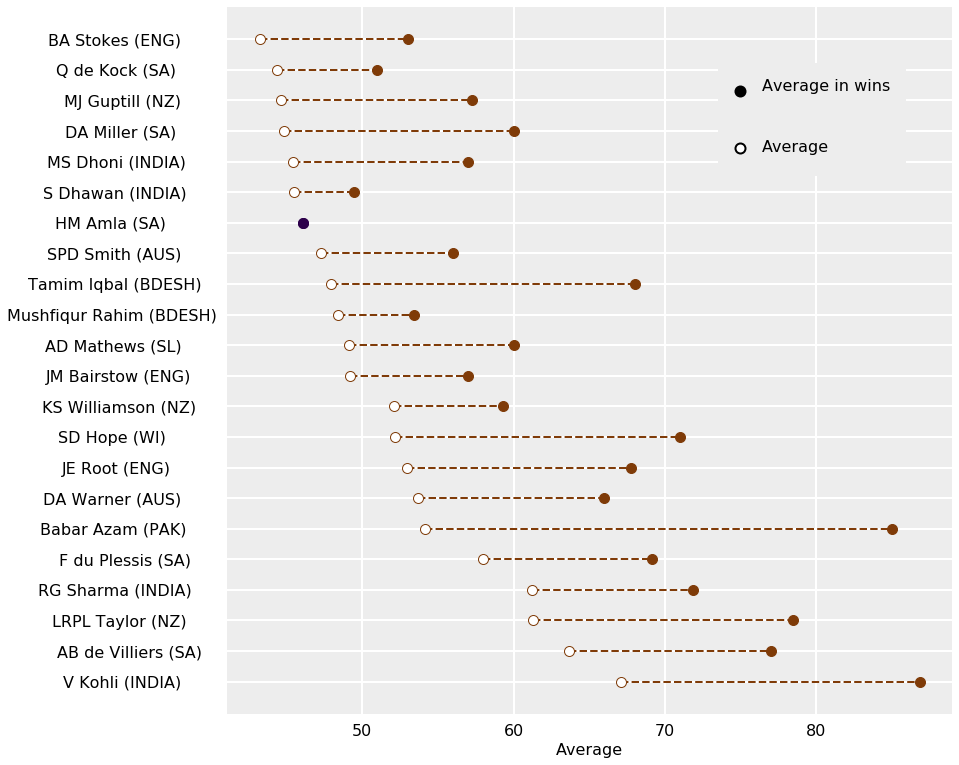

In [41]:
fig = plt.figure(figsize=(13,13))
ax = fig.add_subplot(111)

# get colours
colors = plt.get_cmap('PuOr',2)
yval = 0

for player in sorted_avg[0:22]:
    if player_win_avg[player] > player_avg[player]:
        fillcolor = colors(0)
    else:
        fillcolor = colors(1)
    
    ax.plot([player_avg[player],player_win_avg[player]],[yval,yval],linestyle='--',linewidth=2,color=fillcolor)
    ax.plot(player_avg[player],yval,'o',markersize=10,color='white',markeredgecolor=fillcolor)
    ax.plot(player_win_avg[player],yval,'o',color=fillcolor,markersize=10)
    yval += 1

plt.yticks(np.arange(22))
ax.set_yticklabels(sorted_avg[0:22])

leg = fig.add_axes([0.65,0.7,0.2,0.12])
leg.plot([0],[1],'o',color='black',markersize=10,markeredgewidth=2)
leg.text(0.3,1,'Average in wins')
leg.plot([0], [0], 'o', color='white', markeredgecolor='black', markeredgewidth=2, markersize=10)
leg.text(0.3, 0, 'Average', ha='left', va='center')
leg.set_xticks([])
leg.set_yticks([])
leg.set_xlim(-0.3, 2.3)
leg.set_ylim(-0.5, 1.5)

ax.grid(color='white',linewidth=2)

ax.set_xlabel('Average')
plt.show()

In [42]:
df['big_score_pts'] = (df['50']*1+df['100']*2)/df['inns']

In [43]:
df['weighted_avg'] = (df['win_avg']*1.5+df['average'])/2

In [44]:
df['weighted_str'] = (df['win_str']*1.25+df['SR'])/2

In [45]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df[['weighted_avg','weighted_str']])

In [46]:
scaled_ = pd.DataFrame(scaled,columns = ['scaled_avg','scaled_str'])

In [47]:
df = pd.concat([df,scaled_],axis=1)

In [48]:
df['score'] = df['scaled_avg'] + df['scaled_str'] + df['big_score_pts']

In [49]:
df['score']  =df['score']*33

In [79]:
scores = list(df.score.values)

In [80]:
scores_dict = {}
for player,score in zip(players,scores):
    scores_dict[player] = score

In [72]:
players
modified_names = {}
for player in players:
    words = player.rstrip().split(' ')
    modified_names[player] = words[0][0] +' '+ words[-2]

In [73]:
modified_names['AB de Villiers (SA)   '] = 'ABD'
modified_names['LRPL Taylor (NZ)      '] = 'R. Taylor'

In [74]:
modified_names

{'V Kohli (INDIA)       ': 'V Kohli',
 'RG Sharma (INDIA)     ': 'R Sharma',
 'JE Root (ENG)         ': 'J Root',
 'KS Williamson (NZ)    ': 'K Williamson',
 'LRPL Taylor (NZ)      ': 'R. Taylor',
 'S Dhawan (INDIA)      ': 'S Dhawan',
 'F du Plessis (SA)     ': 'F Plessis',
 'Q de Kock (SA)        ': 'Q Kock',
 'AJ Finch (AUS)        ': 'A Finch',
 'MJ Guptill (NZ)       ': 'M Guptill',
 'EJG Morgan (ENG)      ': 'E Morgan',
 'DA Warner (AUS)       ': 'D Warner',
 'HM Amla (SA)          ': 'H Amla',
 'SPD Smith (AUS)       ': 'S Smith',
 'Mushfiqur Rahim (BDESH)': 'M Rahim',
 'JC Buttler (ENG)      ': 'J Buttler',
 'AD Mathews (SL)       ': 'A Mathews',
 'Tamim Iqbal (BDESH)   ': 'T Iqbal',
 'JJ Roy (ENG)          ': 'J Roy',
 'Babar Azam (PAK)      ': 'B Azam',
 'SD Hope (WI)          ': 'S Hope',
 'AB de Villiers (SA)   ': 'ABD',
 'MS Dhoni (INDIA)      ': 'M Dhoni',
 'JM Bairstow (ENG)     ': 'J Bairstow',
 'Shakib Al Hasan (BDESH)': 'S Hasan',
 'Sikandar Raza (ZIM)   ': 'S Raza',


findfont: Font family ['Avenir'] not found. Falling back to DejaVu Sans.


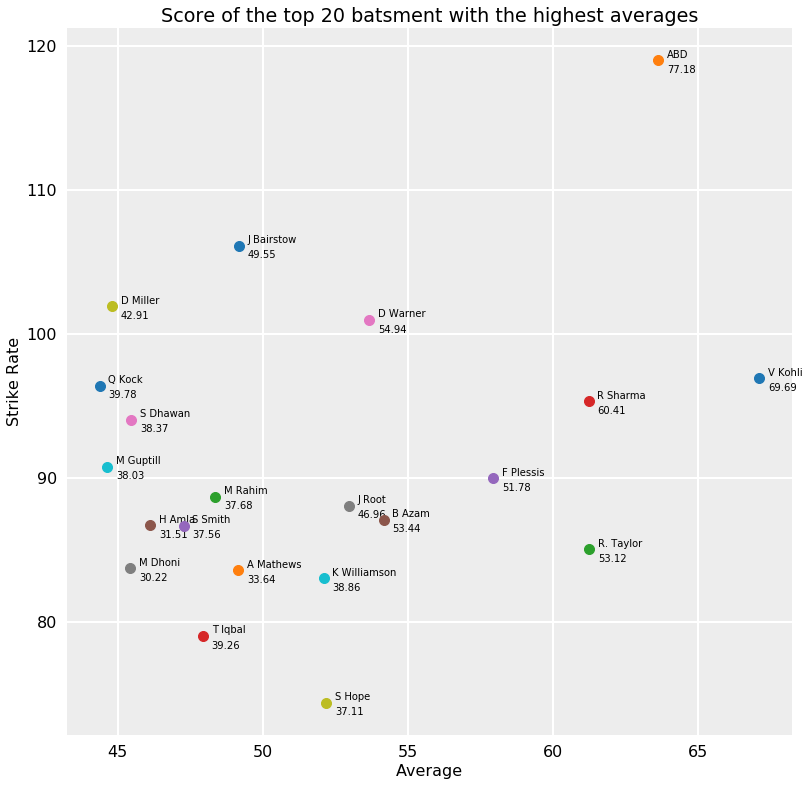

In [81]:
fig = plt.figure(figsize=(13,13))
ax = fig.add_subplot(111)

for player in sorted_avg[0:21]:
    
    ax.plot(player_avg[player],player_str[player],'o',markersize=10,zorder=3)
    ax.text(player_avg[player]+0.3,player_str[player]+0.05,modified_names[player],ha='left',va='bottom',size=10,zorder=2)
    ax.text(player_avg[player]+0.3,player_str[player]-1,round(scores_dict[player],2),ha='left',va='bottom',size=10,zorder=2)
    
ax.grid(color='white',linewidth=2)

ax.set_xlabel('Average')
ax.set_ylabel('Strike Rate')

plt.title('Score of the top 20 batsment with the highest averages')

plt.show()



In [86]:
df.to_csv('player_modified.csv',index=False)